In [1]:
from google.colab import drive

drive.mount('/content/gdrive')
root_path = 'gdrive/My Drive/Colab Notebooks/CS221/'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [42]:
# Load the Pandas libraries with alias 'pd' 
import pandas as pd 
# Read data from file 'filename.csv' 
# (in the same directory that your python process is based)
# Control delimiters, rows, column names with read_csv (see later) 
data1 = pd.read_csv('gdrive/My Drive/Colab Notebooks/CS221/reinforce_0.1.csv') 
data1.rename(columns={'mean_reward_100_steps': '0.1'}, inplace=True)
data2 = pd.read_csv('gdrive/My Drive/Colab Notebooks/CS221/reinforce_0.01.csv') 
data2.rename(columns={'mean_reward_100_steps': '0.01'}, inplace=True)
data3 = pd.read_csv('gdrive/My Drive/Colab Notebooks/CS221/reinforce_0.001.csv') 
data3.rename(columns={'mean_reward_100_steps': '0.001'}, inplace=True)
data3.join(data1,lsuffix='steps')
# Preview the first 5 lines of the loaded data 
#data1.head()
data3.head()
result = pd.concat([data1,data2,data3], axis=1, sort=False)

del result['Unnamed: 0']
del result['steps']
result.head()

,0.1,0.01,0.001
0,-295.511486,-375.404012,-152.520373
1,-345.271687,-295.249962,-215.049612
2,-347.132939,-256.062230,-216.458928
3,-292.238444,-231.462581,-193.471380
4,-399.730971,-216.476528,-209.601042


In [0]:
import numpy as np
import matplotlib.pyplot as plt

# Fixing random state for reproducibility
np.random.seed(19680801)

# fake up some data
spread = np.random.rand(50) * 100
center = np.ones(25) * 50
flier_high = np.random.rand(10) * 100 + 100
flier_low = np.random.rand(10) * -100
data = np.concatenate((spread, center, flier_high, flier_low))

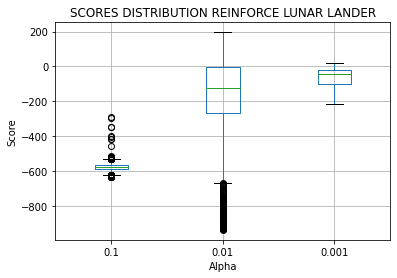

In [47]:
fig1, ax1 = plt.subplots()
ax1.set_title('SCORES DISTRIBUTION REINFORCE LUNAR LANDER')
#ax1.set_axisbelow(True)
ax1.set_xlabel('Alpha')
ax1.set_ylabel('Score')
#ax1.boxplot(result)
result.boxplot(column =['0.1','0.01','0.001']) 


In [127]:
# Load the Pandas libraries with alias 'pd' 
import pandas as pd 
# Read data from file 'filename.csv' 
# (in the same directory that your python process is based)
# Control delimiters, rows, column names with read_csv (see later) 
data1 = pd.read_csv('gdrive/My Drive/Colab Notebooks/CS221/DQN_LL.csv') 
data1.rename(columns={'0': 'DQN'}, inplace=True)
data2 = pd.read_csv('gdrive/My Drive/Colab Notebooks/CS221/DDQN_LL.csv')
#data2=data2.transpose() 
#data2=data2.rename(columns={'0': 'DDQN'}, inplace=True)
#data2=data2.drop(data2.index[0])
#data2=data2.drop(['Unnamed: 0'])
data2.rename(columns={'0': 'DDQN'}, inplace=True)
data3 = pd.read_csv('gdrive/My Drive/Colab Notebooks/CS221/reinforce_0.01.csv') 
data3.rename(columns={'mean_reward_100_steps': 'REINFORCE'}, inplace=True)
data4 = pd.read_csv('gdrive/My Drive/Colab Notebooks/CS221/lander-a2c-tag-reward_100.csv') 
data4.rename(columns={'Value': 'A2C'}, inplace=True)
#data3.join(data1,lsuffix='steps')
# Preview the first 5 lines of the loaded data 
#data4.head()
#data2.head()
resultado = pd.concat([data1,data2,data3,data4], axis=1, sort=False)
resultado.head()
del resultado['Unnamed: 0']
del resultado['steps']
del resultado['Step']
del resultado['Wall time']
resultado.head()


,DQN,DDQN,REINFORCE,A2C
0,0.000000,-130.211301,-375.404012,-168.849136
1,-120.613598,-26.974756,-295.249962,-165.829819
2,-97.413299,-87.826896,-256.062230,-150.722809
3,-380.318554,-84.426222,-231.462581,-165.730194
4,-247.240901,-384.303176,-216.476528,-150.127304


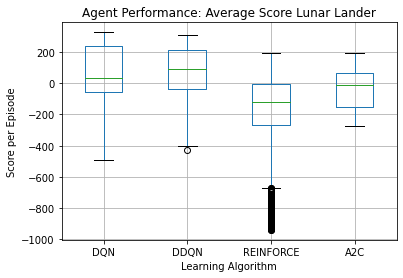

In [130]:
fig1, ax1 = plt.subplots()
ax1.set_title('Agent Performance: Average Score Lunar Lander')
#ax1.set_axisbelow(True)
ax1.set_xlabel('Learning Algorithm')
ax1.set_ylabel('Score per Episode')
#ax1.boxplot(result)
resultado.boxplot(column =['DQN','DDQN','REINFORCE','A2C']) 
